## Importar Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pickle
import random

## Solo para GPU

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Cargar Datos

In [3]:
# Los datos están almacenados en un archivo pickle.
# los Pickles representan un objeto Python como una cadena de bytes

with open("photos_all.pkl", "rb") as input_file:
    data = pickle.load(input_file)

## Dimensiones de los datos iniciales

In [4]:
data.shape

(14514, 64, 64, 3)

## Imprimir algunas imágenes del conjunto de datos

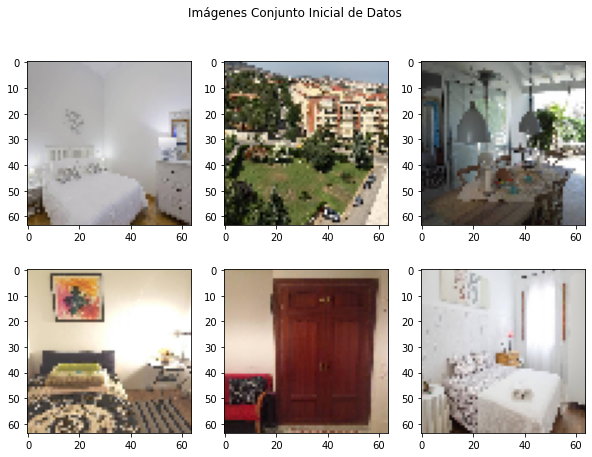

In [5]:
#Seleccionar 6 indices aleatorios de nuestro conjunto de datos
imgs = random.sample(range(0, len(data)), 6)

#Imprimimos
fig = plt.figure(figsize=(10,7))
fig.suptitle('Imágenes Conjunto Inicial de Datos ')


ax1 = fig.add_subplot(2,3,1)
ax1.imshow(data[imgs[0]])
ax2 = fig.add_subplot(2,3,2)
ax2.imshow(data[imgs[1]])
ax3 = fig.add_subplot(2,3,3)
ax3.imshow(data[imgs[2]])
ax4 = fig.add_subplot(2,3,4)
ax4.imshow(data[imgs[3]])
ax4 = fig.add_subplot(2,3,5)
ax4.imshow(data[imgs[4]])
ax4 = fig.add_subplot(2,3,6)
ax4.imshow(data[imgs[5]])


plt.show()

#Cada vez que ejecutemos esta celda cambiaran las imágenes

## Separar datos en conjunto de entrenamiento y prueba

In [6]:
# Obtenemos los indices de nuestro conjunto de datos completo

indices = np.arange(len(data))

In [7]:
# Barajar

np.random.shuffle(indices)

In [8]:
# Separamos

X_train = data[indices[:10000]]
X_test = data[indices[10000:]]

## Dimensiones de X_train y X_test

In [9]:
X_train.shape

(10000, 64, 64, 3)

In [10]:
X_test.shape

(4514, 64, 64, 3)

## Construcción de nuestro Auto Encoder

In [11]:
# Encoder

my_input = tf.keras.layers.Input(shape=(64, 64, 3))

x = tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same")(my_input)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.AveragePooling2D((2,2), padding="same")(x)
x = tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
Encoder = tf.keras.layers.AveragePooling2D((2,2), padding="same")(x)


In [12]:
# Decoder

x = tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same")(Encoder)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3,3), strides=1, padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
Decoder = tf.keras.layers.Conv2D(3, (3,3), strides=1, activation='sigmoid', padding="same")(x)


In [13]:
# Juntar Encoder y Decoder

AutoEncoder = tf.keras.models.Model(my_input, Decoder)

In [14]:
# Compilar el modelo

AutoEncoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.01))

In [15]:
# Entrenar el modelo

AutoEncoder.fit(X_train, X_train, epochs=20, batch_size=200) #, validation_data=(X_test, X_test)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 5s 481us/sample - loss: 0.5698
Epoch 2/20
10000/10000 [==============================] - 2s 216us/sample - loss: 0.5475
Epoch 3/20
10000/10000 [==============================] - 2s 215us/sample - loss: 0.5438
Epoch 4/20
10000/10000 [==============================] - 2s 216us/sample - loss: 0.5416
Epoch 5/20
10000/10000 [==============================] - 2s 216us/sample - loss: 0.5396
Epoch 6/20
10000/10000 [==============================] - 2s 216us/sample - loss: 0.5381
Epoch 7/20
10000/10000 [==============================] - 2s 217us/sample - loss: 0.5373
Epoch 8/20
10000/10000 [==============================] - 2s 216us/sample - loss: 0.5365
Epoch 9/20
10000/10000 [==============================] - 2s 217us/sample - loss: 0.5347
Epoch 10/20
10000/10000 [==============================] - 2s 217us/sample - loss: 0.5338
Epoch 11/20
10000/10000 [==============================] - 2s 217us/sample - loss: 0.5

In [16]:
# Creamos la predicción

prediction = AutoEncoder.predict(X_test[:10].reshape(-1, 64, 64, 3))

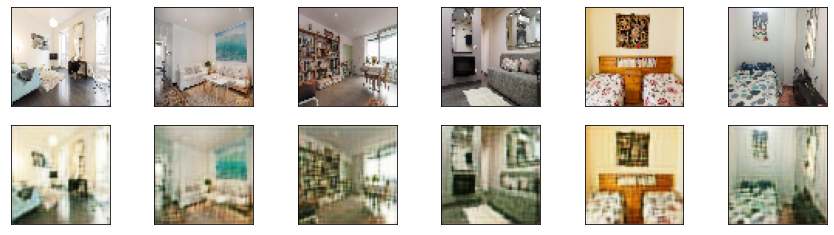

In [17]:
# Imprimir comparativa entre imáges originales y reconstruidas

fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(15,4))
for images, row in zip([X_test[:10], prediction], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((64, 64, 3)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)